# Select
`SELECT` is used every time you want to query data from a database and `*` means all columns.

Suppose we are only interested in two of the columns. We can select individual columns by their names (separated by a comma):

`SELECT column1, column2 
FROM table_name;`

To make it easier to read, we moved `FRO`M to another line.

Line breaks don’t mean anything specific in SQL. We could write this entire query in one line, and it would run just fine.

*** 

# As
Suppose we have the code below:

`SELECT name AS 'Titles'
FROM movies;`

`AS` is a keyword in SQL that allows you to *rename* a column or table using an alias. The new name can be anything you want as long as you put it inside of single quotes. Here we renamed the `name` column as `Titles`.

Some important things to note:

- Although it’s not always necessary, it’s best practice to surround your aliases with single quotes.
- When using AS, the columns are not being renamed in the table. **The aliases only appear in the _result_**.

*** 

# Distinct
When we are examining data in a table, it can be helpful to know what *distinct* values exist in a particular column.

`DISTINCT` is used to return unique values in the output. **It filters out all duplicate values in the specified column(s)**.

`SELECT tools 
FROM inventory;`

might produce:

>tools
>Hammer
>Nails
>Nails
>Nails

By adding `DISTINCT` before the column name,

`SELECT DISTINCT tools 
FROM inventory;`

the result would now be:

>tools
>Hammer
>Nails

Filtering the results of a query is an important skill in SQL. It is easier to see the different possible `genre`s in the `movie` table after the data has been filtered than to scan every row in the table.

*** 

# Where
We can restrict our query results using the `WHERE` clause in order to obtain only the information we want.

Following this format, the statement below filters the result set to only include top rated movies (IMDb ratings greater than 8):

`SELECT *
FROM movies
WHERE imdb_rating > 8;`


- `WHERE` clause filters the result set to only include rows where the following condition is true.

- `imdb_rating > 8` is the condition. Here, only rows with a value greater than 8 in the `imdb_rating` column will be returned.

The `>` is an __*operator*__. Operators create a condition that can be evaluated as either *true* or *false*.

Comparison operators used with the `WHERE` clause are:

- `=` equal to
- `!=` not equal to
- `>` greater than
- `<` less than
- `>=` greater than or equal to
- `<=` less than or equal to

*** 

# Like I
`LIKE` can be a useful operator when you want to compare similar values.

The `movies` table contains two films with similar titles, ‘Se7en’ and ‘Seven’.

How could we select all movies that start with ‘Se’ and end with ‘en’ and have exactly one character in the middle?

`SELECT * 
FROM movies
WHERE name LIKE 'Se_en';`

- `LIKE` is a special operator used with the `WHERE` clause to search for a specific pattern in a column.
- `name LIKE 'Se_en'` is a condition evaluating the name column for a specific pattern.
- `Se_en` represents a pattern with a wildcard character.

The `_` means you can substitute any individual character here without breaking the pattern. The names `Seven` and `Se7en` both match this pattern.

# Like II
The percentage sign `%` is another wildcard character that can be used with `LIKE`.

This statement below filters the result set to only include movies with names that begin with the letter ‘A’:

`SELECT * 
FROM movies
WHERE name LIKE 'A%';`

`%` is a wildcard character that matches zero or more missing letters in the pattern. For example:

- `A%` matches all movies with names that begin with letter ‘A’
- `%a` matches all movies that end with ‘a’

We can also use % both before and after a pattern:

`SELECT * 
FROM movies 
WHERE name LIKE '%man%';`

Here, any movie that contains the word ‘man’ in its name will be returned in the result.

`LIKE` is not case sensitive. ‘Batman’ and ‘Man of Steel’ will both appear in the result of the query above.

***

# Is Null
More often than not, the data you encounter will have missing values.

Unknown values are indicated by `NULL`.

It is not possible to test for `NULL` values with comparison operators, such as `=` and `!=`.

Instead, we will have to use these operators:

- `IS NULL`
- `IS NOT NULL`

To filter for all movies *with* an IMDb rating:

`SELECT name
FROM movies 
WHERE imdb_rating IS NOT NULL;`

***

# Between
The `BETWEEN` operator is used in a `WHERE` clause to filter the result set within a certain *range*. It accepts two values that are either numbers, text or dates.

For example, this statement filters the result set to only include movies with `year`s from 1990 up to, *and including* 1999.

`SELECT *
FROM movies
WHERE year BETWEEN 1990 AND 1999;`

When the values are text, `BETWEEN` filters the result set for within the alphabetical range.

In this statement, `BETWEEN` filters the result set to only include movies with `name`s that begin with the letter ‘A’ up to, but not including ones that begin with ‘J’.

`SELECT *
FROM movies
WHERE name BETWEEN 'A' AND 'J';`

However, if a movie has a name of simply ‘J’, it would actually match. This is because `BETWEEN` *goes up* to the second value — up to ‘J’. So the movie named ‘J’ would be included in the result set but not ‘Jaws’.

***

# And
Sometimes we want to combine multiple conditions in a `WHERE` clause to make the result set more specific and useful.

One way of doing this is to use the `AND` operator. Here, we use the `AND` operator to only return 90’s romance movies.

`SELECT * 
FROM movies
WHERE year BETWEEN 1990 AND 1999
   AND genre = 'romance';`
   
- `year BETWEEN 1990 AND 1999` is the 1st condition.

- `genre = 'romance'` is the 2nd condition.

- `AND` combines the two conditions.

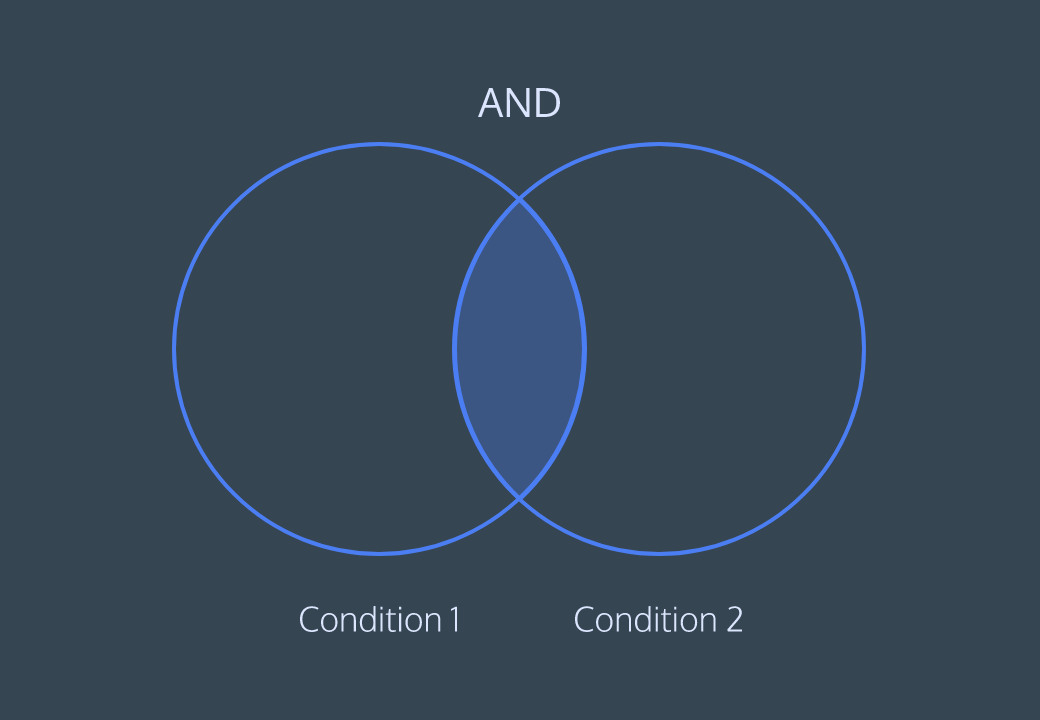
With `AND`, *both* conditions must be true for the row to be included in the result.

***

# Or
Similar to `AND`, the `OR` operator can also be used to combine multiple conditions in `WHERE`, but there is a fundamental difference:

- `AND` operator displays a row if *all* the conditions are true.
- `OR` operator displays a row if *any* condition is true.

Suppose we want to check out a new movie or something action-packed:

`SELECT *
FROM movies
WHERE year > 2014
   OR genre = 'action';`
   
- `year > 2014` is the 1st condition.

- `genre = 'action'` is the 2nd condition.

- `OR` combines the two conditions.

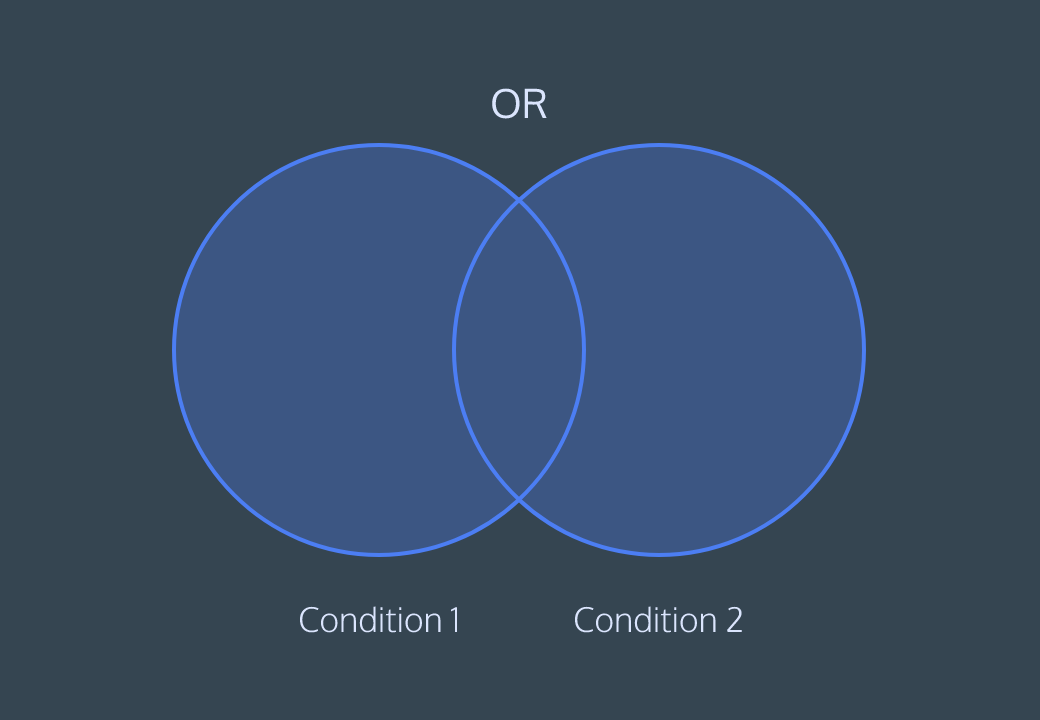
With `OR`, if *any* of the conditions are true, then the row is added to the result.

***

# Order By
It is often useful to list the data in our result set in a particular order.

We can sort the results using `ORDER BY`, either alphabetically or numerically. Sorting the results often makes the data more useful and easier to analyze.

For example, if we want to sort everything by the movie’s title from A through Z:

`SELECT *
FROM movies
ORDER BY name;`

- `ORDER BY` is a clause that indicates you want to sort the result set by a particular column.
- `name` is the specified column.

Sometimes we want to sort things in a decreasing order. For example, if we want to select all of the well-received movies, sorted from highest to lowest by their year:

`SELECT *
FROM movies
WHERE imdb_rating > 8
ORDER BY year DESC;`

- `DESC` is a keyword used in `ORDER BY` to sort the results in *descending* order (high to low or Z-A).
- `ASC` is a keyword used in `ORDER BY` to sort the results in *ascending* order (low to high or A-Z). Ascending doesn't need to be specified because it is the default when ordering by.

The column that we `ORDER BY` doesn’t even have to be one of the columns that we’re displaying.

**Note: `ORDER BY` always goes after `WHERE` (if `WHERE` is present).**

***

# Limit
Most SQL tables contain hundreds of thousands of records. In those situations, it becomes important to cap the number of rows in the result.

For instance, imagine that we just want to see a few examples of records.

`SELECT *
FROM movies
LIMIT 10;`

`LIMIT` is a clause that lets you specify the maximum number of rows the result set will have. This saves space on our screen and makes our queries run faster.

Here, we specify that the result set can’t have more than 10 rows.

`LIMIT` always goes at the very *end* of the query. Also, it is not supported in all SQL databases.

***

# Case
A `CASE` statement allows us to create different outputs (usually in the `SELECT` statement). It is SQL’s way of handling if-then logic.

Suppose we want to condense the ratings in movies to three levels:

- *If the rating is above 8, then it is Fantastic*.
- *If the rating is above 6, then it is Poorly Received*.
- *Else, Avoid at All Costs*.

`SELECT name,
 CASE
  WHEN imdb_rating > 8 THEN 'Fantastic'
  WHEN imdb_rating > 6 THEN 'Poorly Received'
  ELSE 'Avoid at All Costs'
 END
FROM movies;`

- Each `WHEN` tests a condition and the following `THEN` gives us the string if the condition is true.
- The `ELSE` gives us the string if *all* the above conditions are false.
- The `CASE` statement must end with `END`.

In the result, you have to scroll right because the column name is very long. To shorten it, we can rename the column to ‘Review’ using `AS`:

`SELECT name,
 CASE
  WHEN imdb_rating > 8 THEN 'Fantastic'
  WHEN imdb_rating > 6 THEN 'Poorly Received'
  ELSE 'Avoid at All Costs'
 END AS 'Review'
FROM movies;`

***
## Summary
- `SELECT` is the clause we use every time we want to query information from a database.
- `AS` renames a column or table.
- `DISTINCT` return unique values.
- `WHERE` is a popular command that lets you filter the results of the query based on conditions that you specify.
- `LIKE` and `BETWEEN` are special operators.
- `AND` and `OR` combines multiple conditions.
- `ORDER BY` sorts the result.
- `LIMIT` specifies the maximum number of rows that the query will return.
- `CASE` creates different outputs.